# Economics Ph.D. Job Placement Data 2024 Update
*Wuyang Ren*


## Coverage

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np

In [2]:
api_url = "https://support.econjobmarket.org/api/mapinator"
response = requests.get(api_url)

pl_data = response.json()
pl_df = pd.DataFrame(pl_data)

### Top 100 Institutions (Tilburg Ranking)

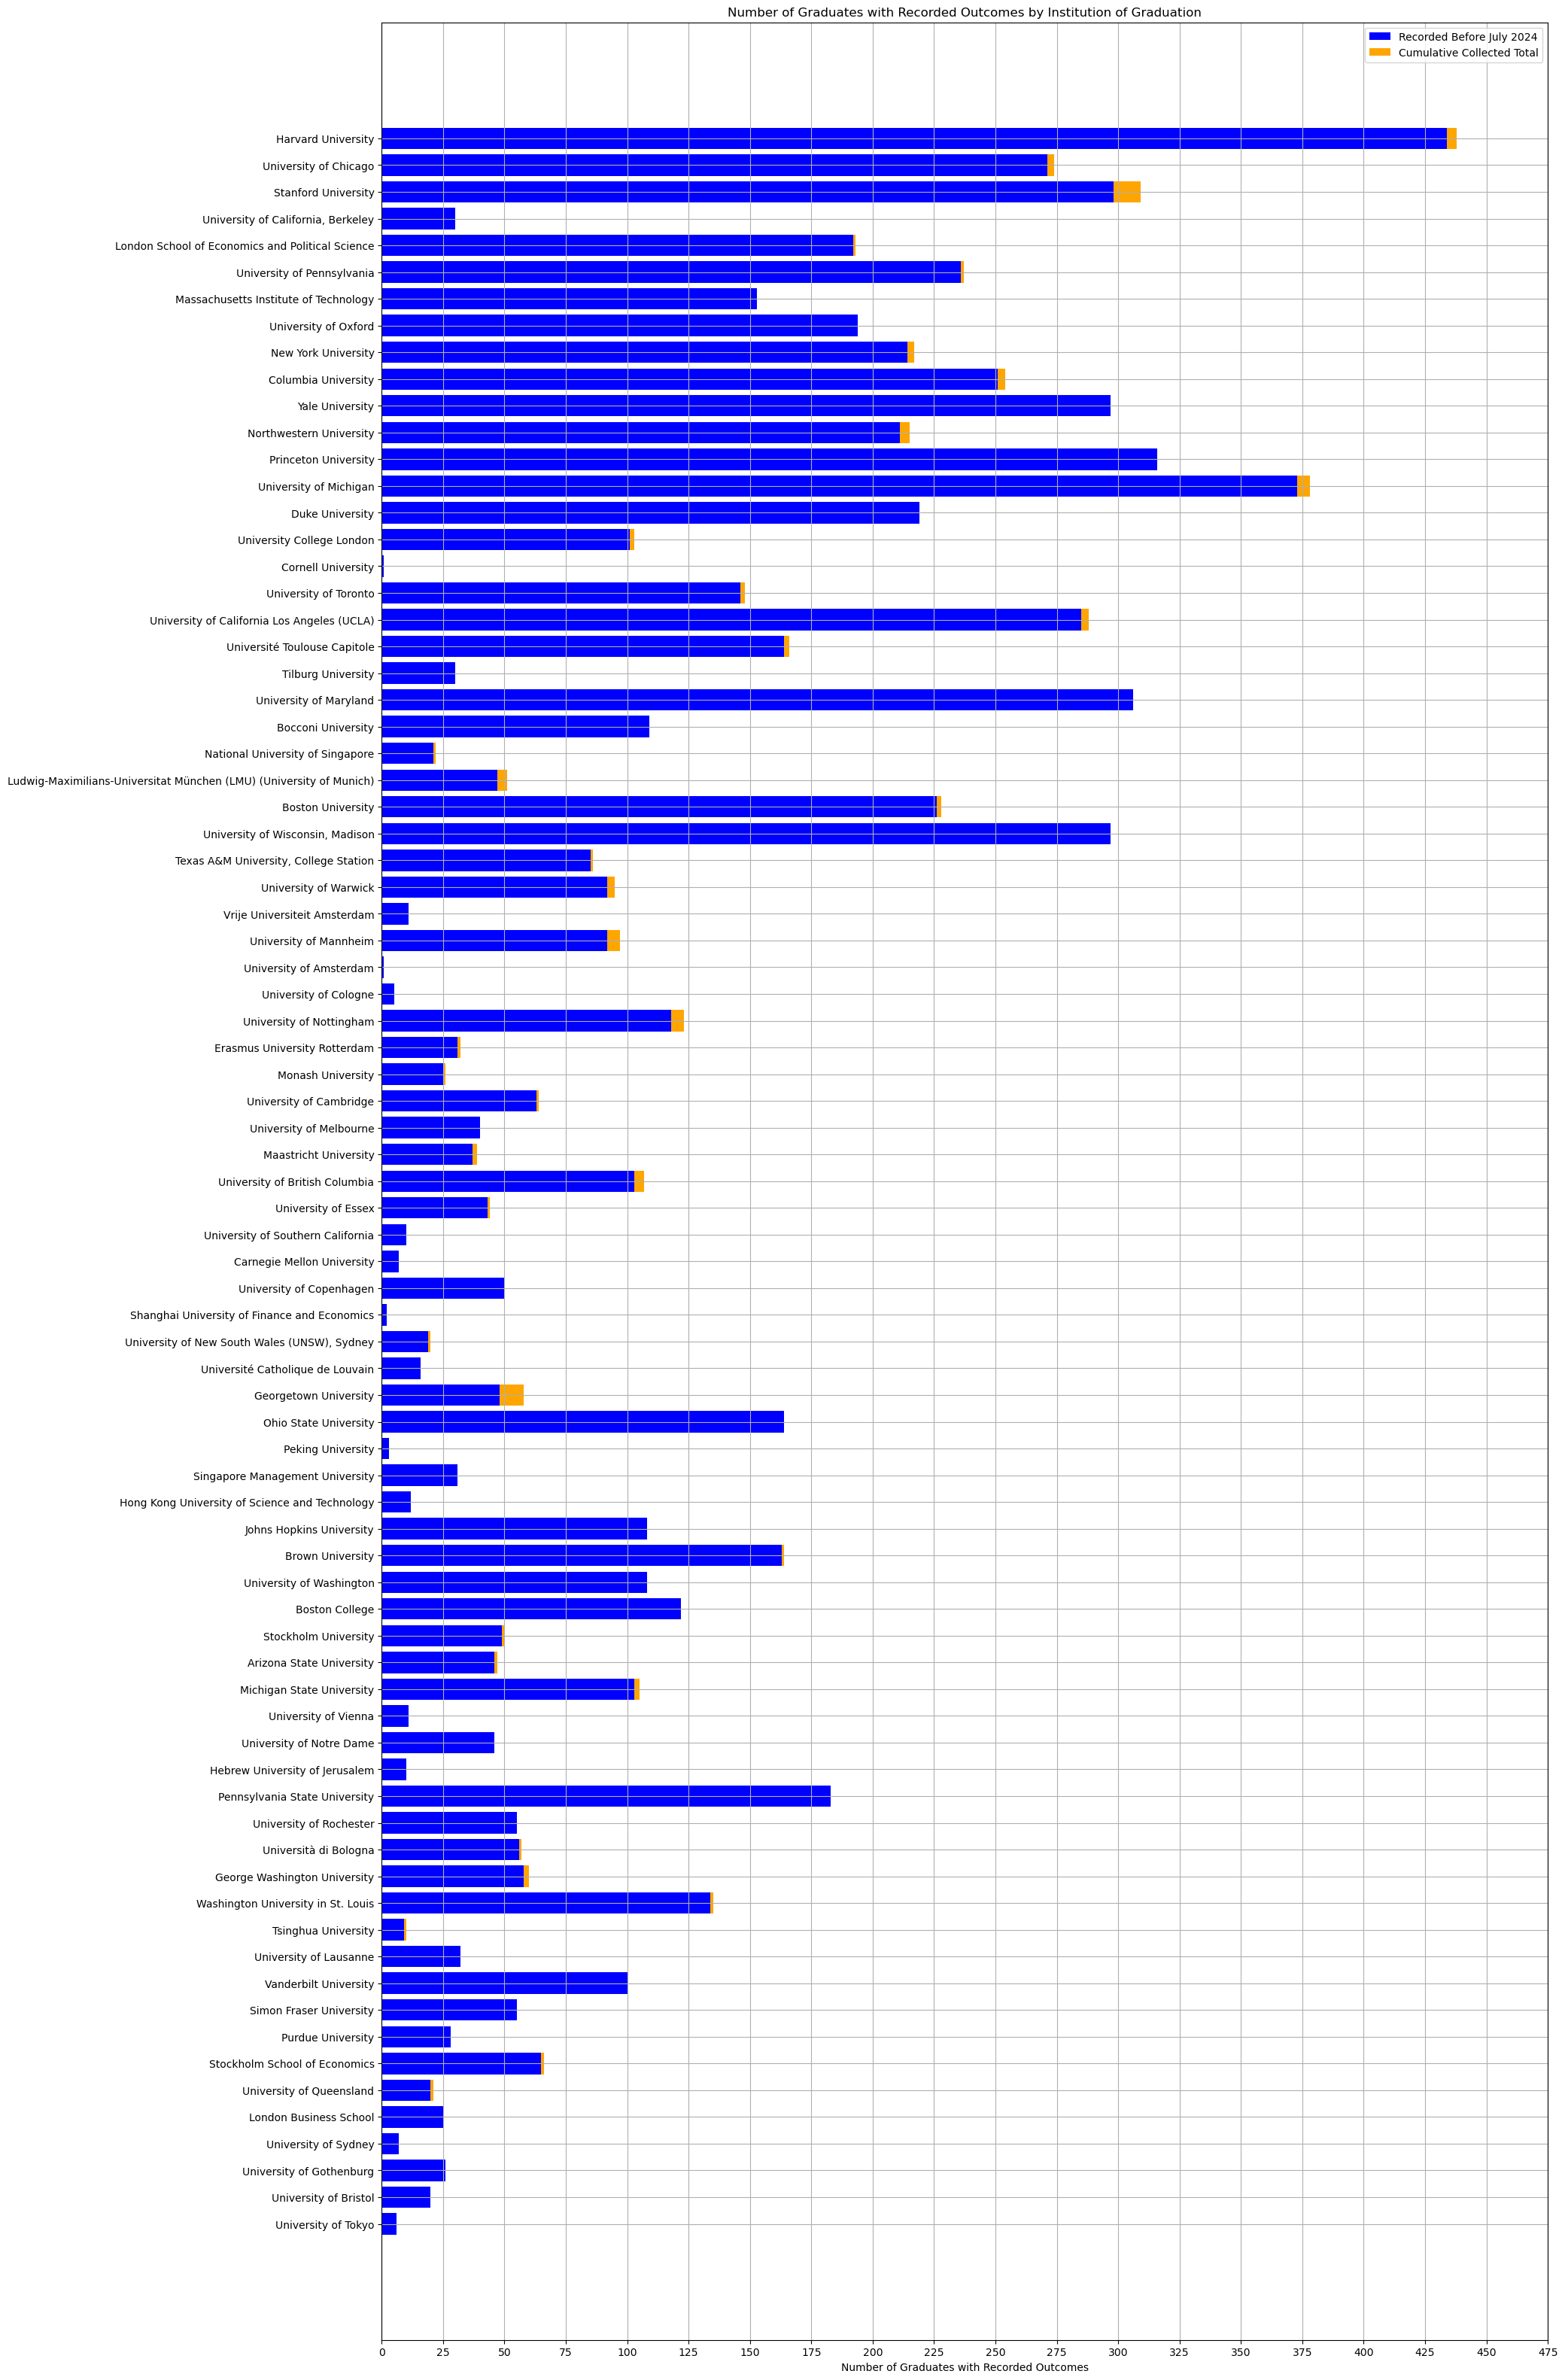

In [3]:
top_100 = pl_df[pl_df['rank'] <= 100].sort_values(by='rank', ascending = False)
top_100['created_at'] = pd.to_datetime(top_100['created_at'])
top_100['startdate']= pd.to_datetime(top_100['startdate'])
top_100['year'] = top_100['startdate'].dt.year

after_mask = top_100['created_at'] >= pd.Timestamp('2024-07-01')
before_mask = top_100['created_at'] < pd.Timestamp('2024-07-01')

top_100_after = top_100[after_mask]
top_100_before = top_100[before_mask]

institutions = list(top_100['from_institution_name'].unique())

before_counts = [len(top_100_before[top_100_before['from_institution_name'] == i]['aid'].unique()) for i in institutions]
after_counts = [len(top_100_after[top_100_after['from_institution_name'] == i]['aid'].unique()) for i in institutions]

fig, ax = plt.subplots(figsize=(20, 40))
bar1 = plt.barh(institutions, before_counts, color='blue', label='Recorded Before July 2024')
bar2 = plt.barh(institutions, after_counts, left=before_counts, color='orange', label='Cumulative Collected Total')

ax.set_xlabel('Number of Graduates with Recorded Outcomes')
ax.set_title('Number of Graduates with Recorded Outcomes by Institution of Graduation')
ax.legend()
ax.grid()
x_ticks = np.arange(0, 500, 25)
ax.set_xticks(x_ticks)

plt.show()

### Graduates by Year: First-Time Hires

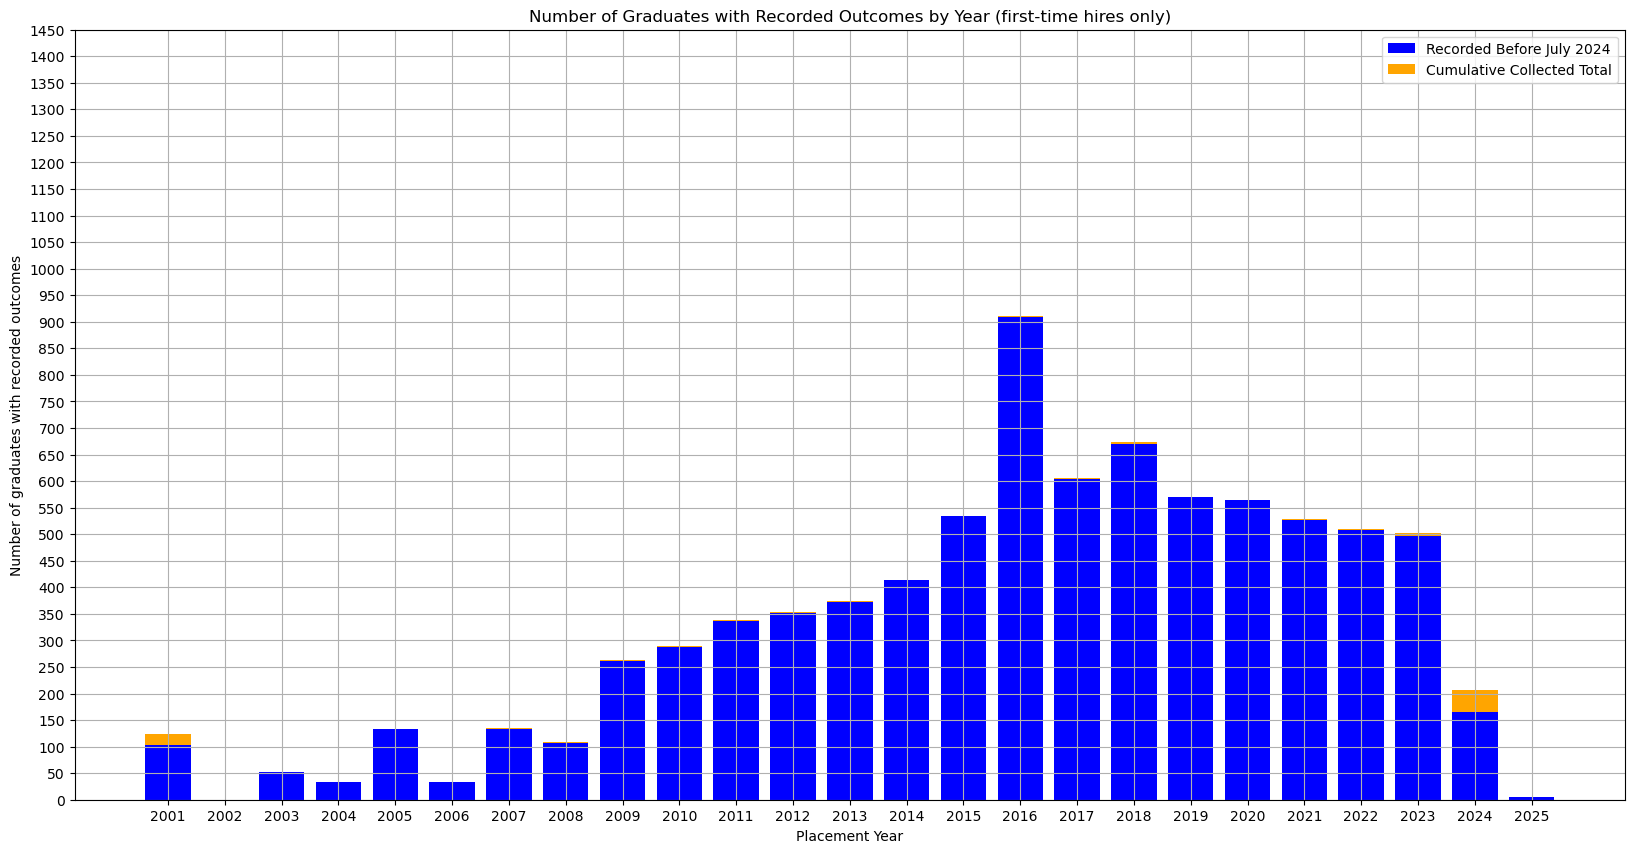

In [4]:
top_100['startdate']= pd.to_datetime(top_100['startdate'])
top_100['year'] = top_100['startdate'].dt.year

top_100_unique = top_100.sort_values('year').groupby('aid').first().reset_index()

top_100_unique_before = top_100_unique[top_100_unique['created_at'] < pd.Timestamp('2024-07-01')]
top_100_unique_after = top_100_unique[top_100_unique['created_at'] >= pd.Timestamp('2024-07-01')]

before_first_time = top_100_unique_before.groupby('year').size()
after_first_time = top_100_unique_after.groupby('year').size()

years = before_first_time.index.union(after_first_time.index)
before_first_time = before_first_time.reindex(years, fill_value=0)
after_first_time = after_first_time.reindex(years, fill_value=0)


fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(years, before_first_time, color='blue', label='Recorded Before July 2024')
bar2 = ax.bar(years, after_first_time, bottom=before_first_time, color='orange', label='Cumulative Collected Total')

ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1500, 50)
x_ticks = np.arange(2001, 2026, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year (first-time hires only)")
ax.legend()
ax.grid()

plt.show()

### Graduates by Year: All Hires

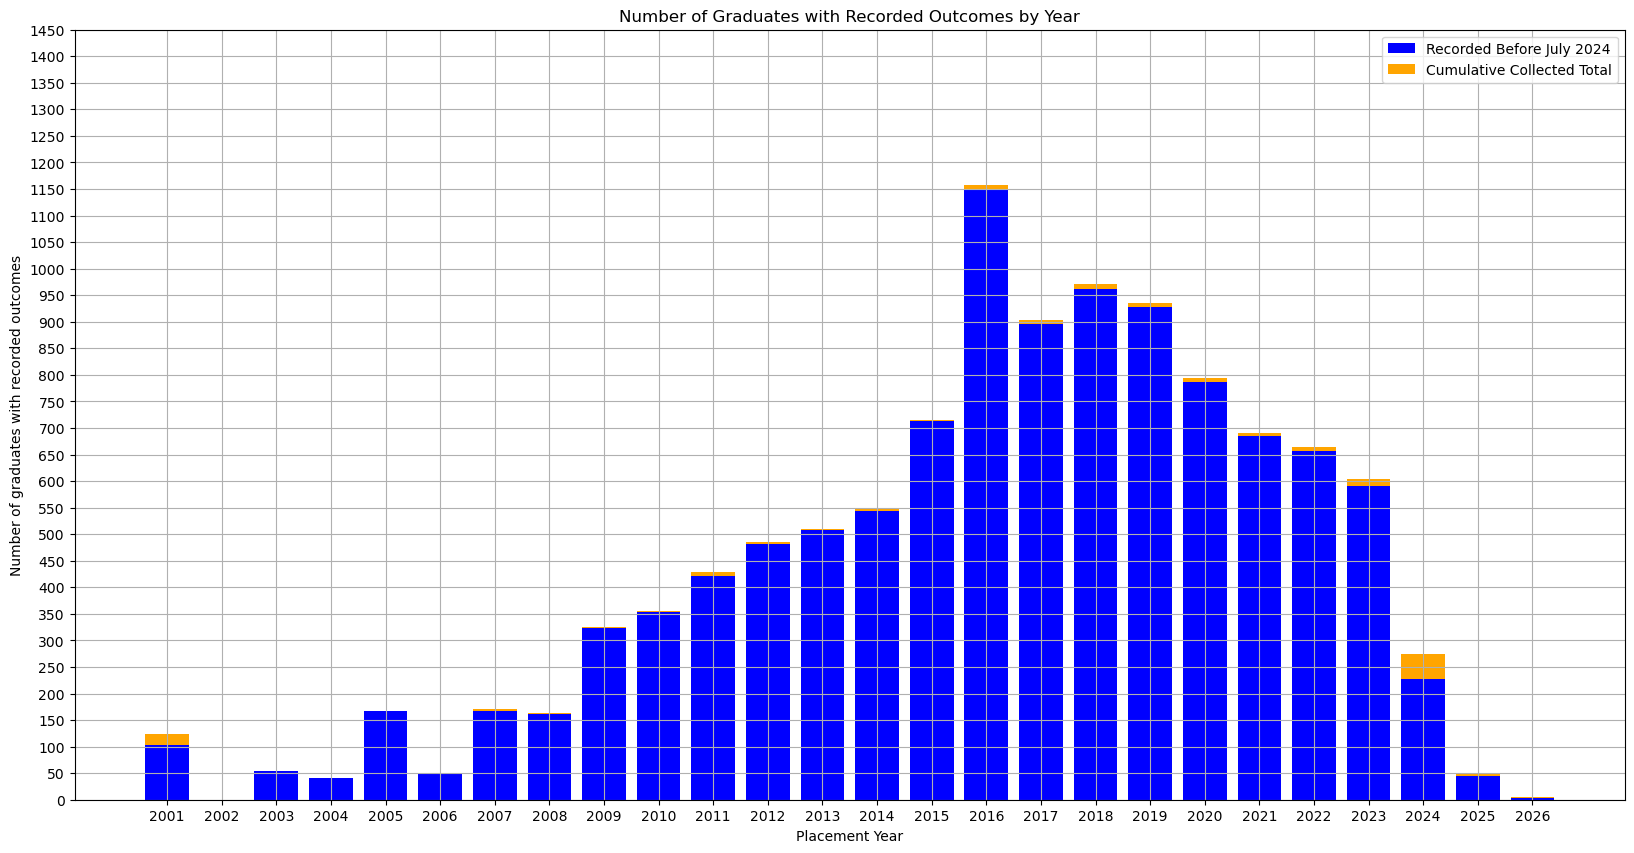

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))

before_total = top_100_before.groupby('year').size()
after_total = top_100_after.groupby('year').size()

years = before_total.index.union(after_total.index)
before_total = before_total.reindex(years, fill_value=0)
after_total = after_total.reindex(years, fill_value=0)


bar1 = ax.bar(years, before_total, color='blue', label='Recorded Before July 2024')
bar2 = ax.bar(years, after_total, bottom=before_total, color='orange', label='Cumulative Collected Total')

ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1500, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year")
ax.legend()
ax.grid()

plt.show()